# CUSTOMER CHURN IN TELECOMMUNICATION COMPANY

## Project overview

This project seeks to build a classifier to predict whether a customer will soon stop doing business with SyriaTel, which is a telecommunications company. It seeks to identify any predictable patterns among customers who have already left and use these features to predict customers who are likely to leave in the future. 

Customer churn is the loss of clients or customers. Predicting churn helps the Telecom company to:

1. Identify at risk customers and implement *highly targeted* efforts to stop them churning.
2. Identify pain points and friction across a customers journey.
3. Identify strategies that target these pain points to lower churn and increase retention rates.



## Business understanding

### Business problem

SyriaTel, a telecommunication company is facing the problem of an increase in the number of customers who leave the company. A consistently high churn rate could result in the company quickly becoming unsustainable. 

Attracting new customers as a strategy is not enough to sustain the company for very long. 

It is therefore important for the company to increase the number of loyal and devoted customers by identifying the pain points across a company journey and accurately predicting the customers who are likely to churn and therefore targeting them using aggressive strategies to reduce these points of friction.


### Objectives

The main objective for this project is to build a prediction model that can accurately predict customers who are likely to churn from the company.
This objective will be achieved through the methods outlined in the specific objectives:

1. To build a machine learning model that can accurately predict customers  who will churn based on the features in the dataset.
2. To rank features these features in the dataset according to their order of significance

### Success criteria

The model performances will be compared using the Recall (Sensitivity) score. This is given by: (TP/TP+FN). 

From this, the aim is to reduce the number of false negatives, as it would be detremental for the model to predict that customers will are not going to churn while they actually will. 

A model with a recall of greater than 0.75 would be considered to be a successful model.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


# sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE


In [3]:
# loading the dataset
df = pd.read_csv('Telecom_data.csv')

# Data Understanding

In [4]:
# Displaying the first 5 rows of the data to get a representation of how the columns look like
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#Number of columns and rows of the dataset
print("There are %d rows and %d columns in the dataset." %df.shape)

There are 3333 rows and 21 columns in the dataset.


In [6]:
# A function that checks for datatypes within the dataframe
def check_data_types(dataframe):
    data_types = dataframe.dtypes
    print(data_types)

In [7]:
check_data_types(df)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [8]:
# Number of States
print("There are", df["state"].nunique(), "unique entries in the state Column, representing the number of states")

There are 51 unique entries in the state Column, representing the number of states


From the table above, the information above, the columns "state", "international plan", "voice mail plan" and "churn" have string values. 

The last three have values 'yes' and 'no' and are converted to 1 and 0 respectively to allow for numerical analysis 

The column "state" contains categorical data. For this column, there are two options of dealing with these values: 
1. Using One-hot encoding.
2. Using LabelEncoder.

LabelEncoder was selected to replace each unique State with a unique integer. It was selected over One-hot encoding as there are 51 unique values that would increase the number of columns, causing the dataset to be messy and would affect the analysis of the importance of features in the models.


## The Target Variable

The target variable is "churn". This project seeks to compare the effects of the different variables in respect to the 'churn'. In order to visualize the churn rate in the organization, a plot was created

In [9]:
# A function to plot a pie chart to visualize churn rate

def visualize_churn_rate(df):
    churn_counts = df['churn'].value_counts()
    labels = ['No Churn', 'Churn']
    values = churn_counts.values

    plt.pie(values, labels=labels, autopct="%1.1f%%")
    plt.title("VISUALIZATION OF THE CHURN RATE")
    plt.axis('equal')
    plt.show()


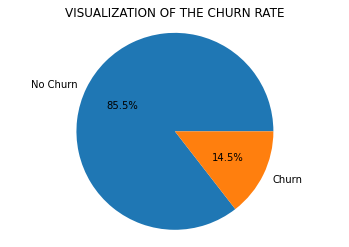

In [10]:
# Visualizing the churn rate
visualize_churn_rate(df)

From the chart shown above, there are more samples for customers without churn than for customers with churn. 
Therefore, there is a class imbalance for the target variable. This class imbalance could lead to predictive models which are biased towards the majority, i.e no churn. 

## The Predictor Variables

The predictors available to us are:
state, account length, area code, international plan, voice mail plan, number vmail messages, total day minutes, total dat calls, total day charge, total eve minutes, total eve calls, total eve charge, total night minutes, total night calls, total night charge, total intl minutes, total intl calls, total intl charge and customer service charge

# DATA PREPARATION

## Detecting and Dealing with missing values

In [11]:
#Checking for null and misssing values
print("There are", df.isnull().values.sum(), "missing values in the dataset")

There are 0 missing values in the dataset


## Data type conversions

In [12]:
# A function that converts target variables that are of string data type to integers

def encode_categorical_columns(df, column_names):
    for column in column_names:
        df[column] = df[column].apply(lambda x: 0 if x == "no" else 1)

In [13]:
# Converting columns 'international plan' and 'voice mail plan' to 1s and 0s
encode_categorical_columns(df, ["international plan", "voice mail plan"])

In [14]:
# Funtion that converts categorical data to numeric through LabelEncoding
from sklearn.preprocessing import LabelEncoder

def encode_categorical_column(dataframe, column_name):
    label_encoder = LabelEncoder()
    dataframe[column_name] = label_encoder.fit_transform(dataframe[column_name])

In [15]:
# Applying LabelEncoder to the column "state"
encode_categorical_column(df, 'state')

## Checking for duplicate values

In [16]:
# A function that checks for duplicate values in a column
def count_duplicates(df, column_name):
    duplicate_count = df.duplicated(subset=column_name).sum()
    return duplicate_count

The phone number is a unique identifier and therefore, it should only contain unique entries

In [17]:
# checking for duplicates in the "phone number" column
duplicate_count = count_duplicates(df, "phone number")
print("There are", duplicate_count, "duplicate values in the phone number column")

There are 0 duplicate values in the phone number column


## Exploratory data analysis

### Univariate analysis

In [18]:
# Statistical overview of the data
df.describe()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,14.824911,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,26.000000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,39.000000,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Creating some graphs to visualize the figures in the table above

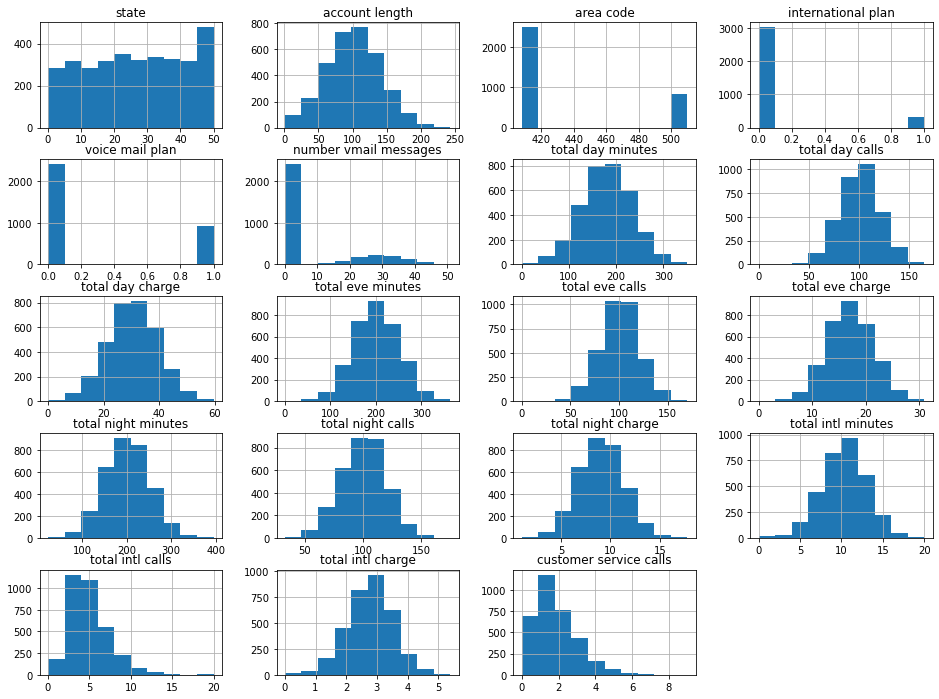

In [19]:
# distribution of features
df.drop(columns='churn').hist(figsize=(16,12));

From the plots displayed above:

1. The scale used across the features is different. Therefore, scaling techniques will be applied to ensure eqaul treatment of features during model training.
2. Features such as 'total intl calls', 'customer service calls' are not normally distributed. They will be normalized


### Multivariate analysis

#### Checking for correlation

In [20]:
#Defining a function that plots a heatmap
def plot_correlation_heatmap(df):
    # Computing a correlation matrix
    corr_matrix = df.corr()

    # Generating a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Setting up the matplotlib figure and axes
    fig, ax = plt.subplots(figsize=(12, 12))

    # Plotting the heatmap
    sns.heatmap(corr_matrix, linewidths=0.5, mask=mask, square=True, ax=ax, annot=True)

    # Setting the plot title
    ax.set_title("Correlation Heatmap")

    plt.show()

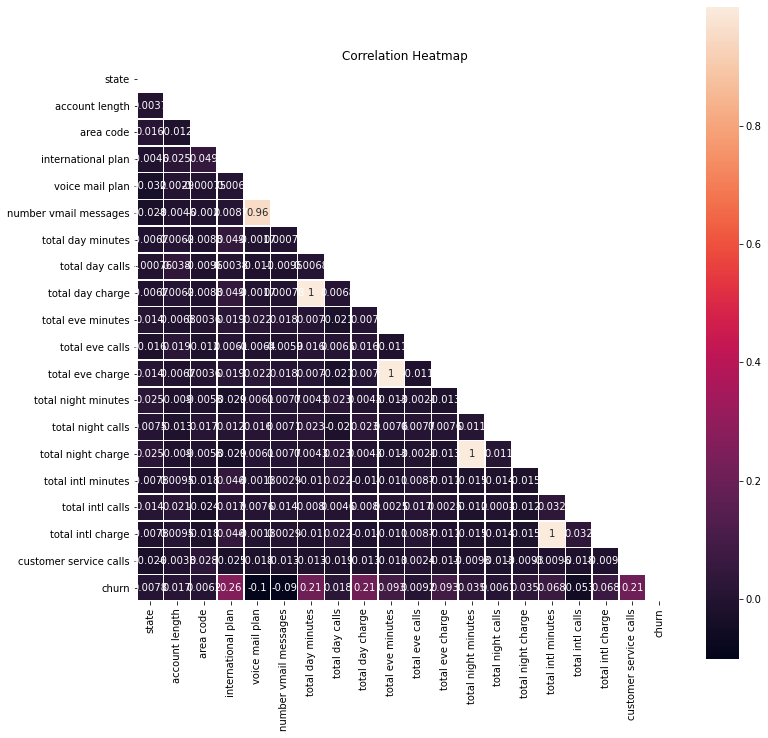

In [21]:
#Plotting a heatmap
plot_correlation_heatmap(df)

From the heatmap above:

1. There is a very low correlation between most features. 
2. Five pairs show high correlation. These are:
- Voice mail messages and voice mail plan (0.96)
- Total day charge and total day minutes (1)
- Total evening charge and total evening minutes (1)
- Total night charge and total night minutes (1)
- Total international charge and total international minutes (1)

These pairs of features display multicollinearity


The correlations can be explained by:
The charges are proportional to the number of minutes the customer spends on a call. Therefore, these charges depend on the number of minutes a customer spends on a call and therefore, they can be dropped

In [22]:
# dropping columns
df.drop(columns = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], inplace = True)


### Train-test split

In [23]:
# Defining y and X vairables
y = df['churn']
X = df.drop(columns=['churn', 'phone number'])

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

### Handling the class imbalance problem

To handle the class imbalance problem, SMOTE (Synthetic Minority Over-sampling Techtique) is used.

In [24]:
# Applying Synthetic Minority Over sampling technique to the dataset
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

In [25]:
# pie chart showing distribution of target variables before and after SMOTE:


def plot_churn_distribution(df, y_train_resampled):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # First pie chart
    churn_counts = df['churn'].value_counts()
    labels = ['No Churn', 'Churn']
    values = churn_counts.values
    ax1.pie(values, labels=labels, autopct="%1.1f%%")
    ax1.set_title('Churn Rate before SMOTE')

    # Second pie chart
    churn_counts1 = y_train_resampled.value_counts()
    labels1 = ['No Churn', 'Churn']
    values1 = churn_counts1.values
    ax2.pie(values1, labels = labels1, autopct = '%.2f')
    ax2.set_title('Churn rate after SMOTE on training set')


    plt.tight_layout()
    plt.show()

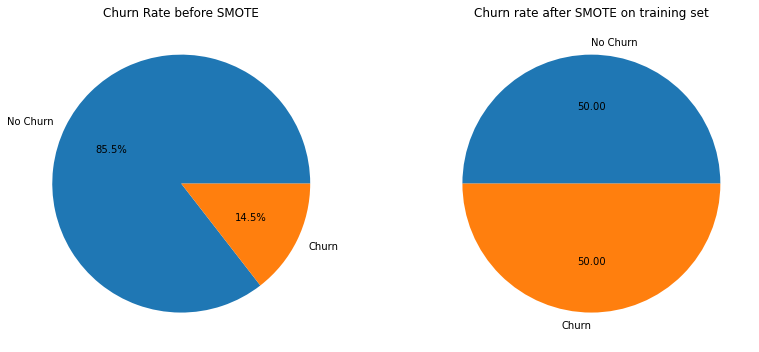

In [26]:
plot_churn_distribution(df, y_train_resampled)

Checking distribution on test data to ensure SMOTE was not applied

In [27]:
def plot_y_test_distribution(y_test):
    churn_counts = y_test.value_counts()
    labels = ['No Churn', 'Churn']
    values = churn_counts.values

    # Replace True with 'Churn' and False with 'No Churn'
    labels = ['No Churn' if label == False else 'Churn' for label in labels]

    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title('Churn Distribution in y_test')
    plt.axis('equal')
    plt.show()

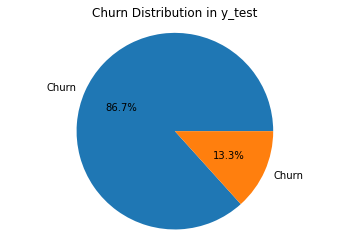

In [28]:
plot_y_test_distribution(y_test)

# Modeling

The project is a binary classifier task. To solve this problem, the models that will be tried are:
1. Logistic regression
2. K-Nearest Neighbours
3. Decision Trees
4. Random Forest
5. Support Vector Machine

The testing set therefore maintained an accurate distribution of the sample dataset

## Creating the base Model

In [29]:
# Defining a function that evaluates the performance of the models
def evaluate(model, X_test, y_test):
    y_train_preds = model.predict(X_train_resampled)
    y_test_preds = model.predict(X_test)
    
    print('Recall Score:')
    print('Train:', recall_score(y_train_resampled, y_train_preds))
    print('Test:', recall_score(y_test, y_test_preds))
    
    print('\nPrecision Score:')
    print('Train:', precision_score(y_train_resampled, y_train_preds))
    print('Test:', precision_score(y_test, y_test_preds))
    
    print('\nAccuracy Score:')
    print('Train:', accuracy_score(y_train_resampled, y_train_preds))
    print('Test:', accuracy_score(y_test, y_test_preds))
    
    print('\nF1 Score:')
    print('Train:', f1_score(y_train_resampled, y_train_preds))
    print('Test:', f1_score(y_test, y_test_preds))
    
    cm = confusion_matrix(y_test, y_test_preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

### Logistic regression is used to create the base model

In order to address the scaling problem, a pipeline that consists of two steps was created. these steps are:
- Scaling using 'StandardScaler' 
- Logistic regression using 'LogisticRegression'


Recall Score:
Train: 0.7860836859426422
Test: 0.7297297297297297

Precision Score:
Train: 0.7339771729587358
Test: 0.29136690647482016

Accuracy Score:
Train: 0.7505876821814763
Test: 0.7278177458033573

F1 Score:
Train: 0.7591373439273553
Test: 0.41645244215938304


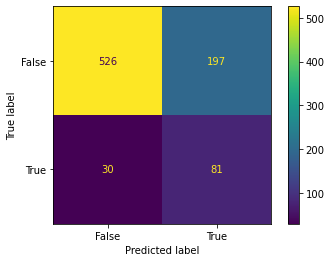

In [30]:
# A function of a pipeline that creates a logistic regression model after standardizing the features
def train_logistic_regression(X_train_resampled, y_train_resampled):
    pipe_log = Pipeline(steps=[('scale', StandardScaler()), ('logreg', LogisticRegression(fit_intercept=False, solver='liblinear'))])
    pipe_log.fit(X_train_resampled, y_train_resampled)
    return pipe_log

logistic_regression_model = train_logistic_regression(X_train_resampled, y_train_resampled)

evaluate(logistic_regression_model, X_test, y_test)


From the results displayed above:

1. The metrics displayed by the Recall score, the Precision score the Accuracy and the F1 score are higher in all instances for the Training set compared to the Testing set.
- This shows that the model is overfitting.
2. From the Confusion Matrix:
- The False negatives are 30. The model predicts that 30 customers will not churn but they actually do churn. The goal is to reduce this number to as low as possible


To improve the predictions, Different other types of models were created. These include:
1. KNN (K Nearest Neigbours)
2. Decision Trees
3. Random Forest
4. Support Vector Machine

### K Nearest Neigbours Model

In [31]:
# A function of a pipeline that creates a KNN model after standardizing the features
pipe_knn = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

# Fitting the pipeline to the resampled training data
pipe_knn.fit(X_train_resampled, y_train_resampled)



Pipeline(steps=[('scale', StandardScaler()), ('clf', KNeighborsClassifier())])

Recall Score:
Train: 0.9797837329572168
Test: 0.6306306306306306

Precision Score:
Train: 0.872331519464211
Test: 0.2928870292887029

Accuracy Score:
Train: 0.918194640338505
Test: 0.7482014388489209

F1 Score:
Train: 0.9229406554472985
Test: 0.4


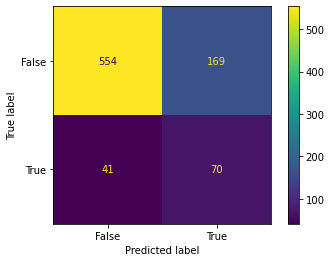

In [32]:
# evaluating the performance of the model
evaluate(pipe_knn, X_test, y_test)

The KNN model performs worse than the baseline model on both the recall and the F1 score.

### Decision Tree Model

In [33]:
# A function of a pipeline that creates a Decision Tree model after standardizing the features
pipe_dt = Pipeline(steps=[('scale', StandardScaler()), ('clf', DecisionTreeClassifier(criterion='entropy', random_state=42))])
pipe_dt.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

Recall Score:
Train: 1.0
Test: 0.7567567567567568

Precision Score:
Train: 1.0
Test: 0.48554913294797686

Accuracy Score:
Train: 1.0
Test: 0.8609112709832134

F1 Score:
Train: 1.0
Test: 0.5915492957746479


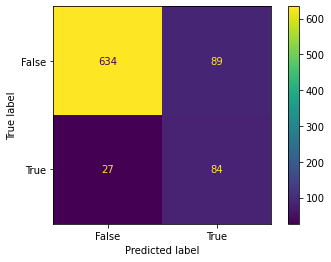

In [34]:
# evaluating the performance of the model
evaluate(pipe_dt, X_test, y_test)

The decision tree model performs better than both the base model and the KNN model in all the metrics

#### Hyperparameter tuning of the Decision Tree model

The hyperparameters of the decision tree including max_depth, min_samples_leaf, min_samples_split can be tuned to early stop the growth of the tree and prevent the model from overfitting.

In [35]:
# hyperparameter tuning using GridSearchCV
params_dt = {'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': range(14, 32, 2),
             'clf__min_samples_split' : range(2, 10, 2),
             'clf__min_samples_leaf': [2, 3, 5, 7, 10],
             'clf__max_features': [11, 13, 15]
}

gridsearch_dt = GridSearchCV(pipe_dt, params_dt, cv=4, scoring='recall')
gridsearch_dt.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               random_state=42))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': range(14, 32, 2),
                         'clf__max_features': [11, 13, 15],
                         'clf__min_samples_leaf': [2, 3, 5, 7, 10],
                         'clf__min_samples_split': range(2, 10, 2)},
             scoring='recall')

In [36]:
# parameters that gave the best result
print(f'Optimal parameters: {gridsearch_dt.best_params_}')

# Mean cross-validated score of the best_estimator
print(f'Validation recall: {gridsearch_dt.best_score_}')

Optimal parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 28, 'clf__max_features': 15, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2}
Validation recall: 0.8913951545530493


Recall Score:
Train: 0.9793135872120358
Test: 0.7657657657657657

Precision Score:
Train: 0.9806967984934086
Test: 0.47752808988764045

Accuracy Score:
Train: 0.9800188058298073
Test: 0.8573141486810552

F1 Score:
Train: 0.9800047047753468
Test: 0.5882352941176471


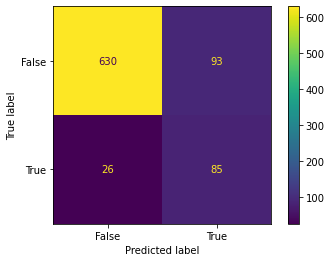

In [37]:
# evaluating the performance of the model
evaluate(gridsearch_dt, X_test, y_test)

The tuned model performs better than the base model, the KNN model and the untuned decision tree model in the recall score. 

### Random forest

Random forest is used since it is naturally resistant to noise and variance.

In [38]:
# creating a pipeline
pipe_rf = Pipeline(steps=[('scale', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])
pipe_rf.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

Recall Score:
Train: 1.0
Test: 0.6216216216216216

Precision Score:
Train: 1.0
Test: 0.75

Accuracy Score:
Train: 1.0
Test: 0.9220623501199041

F1 Score:
Train: 1.0
Test: 0.6798029556650247


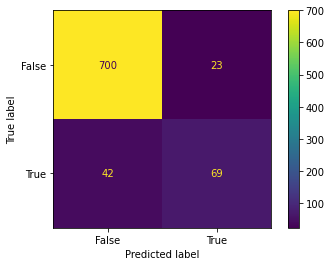

In [39]:
# evaluating model performance
evaluate(pipe_rf, X_test, y_test)

Random Forest model performs poorer in the Recall score than the base model, the KNN model and the decision tree models. Ot has a high number of False negatives

### Hyperparameter tuning of the random forest model

There are some parameters of random forest that can be tuned for the model’s better performance. This includes n_estimators, max_depth, min_samples_split, min_samples_leaf and max_features.

In [40]:
# hyperparameter tuning using GridSearchCV
params_rf = {'rf__n_estimators': range(400, 800, 200),
             'rf__criterion': ['gini', 'entropy'],
             'rf__max_depth': range(14, 20, 2),
             'rf__min_samples_split': range(3, 4, 7),
             'rf__min_samples_leaf': [5, 7, 12]
             
}

gridsearch_rf = GridSearchCV(pipe_rf, params_rf, cv=4, scoring='recall')
gridsearch_rf.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': range(14, 20, 2),
                         'rf__min_samples_leaf': [5, 7, 12],
                         'rf__min_samples_split': range(3, 4, 7),
                         'rf__n_estimators': range(400, 800, 200)},
             scoring='recall')

In [41]:
# parameters that gave the best result
print(f'Optimal parameters: {gridsearch_rf.best_params_}')

# Mean cross-validated score of the best_estimator
print(f'Validation recall: {gridsearch_rf.best_score_}')

Optimal parameters: {'rf__criterion': 'gini', 'rf__max_depth': 18, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 3, 'rf__n_estimators': 400}
Validation recall: 0.8754168259632131


Recall Score:
Train: 0.9647390691114246
Test: 0.6576576576576577

Precision Score:
Train: 0.987487969201155
Test: 0.6822429906542056

Accuracy Score:
Train: 0.9762576398683592
Test: 0.9136690647482014

F1 Score:
Train: 0.9759809750297266
Test: 0.6697247706422017


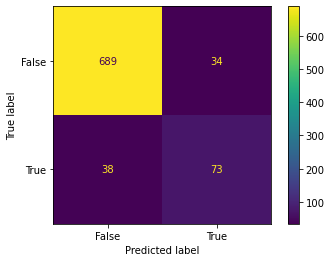

In [42]:
# evaluating the performance of the model
evaluate(gridsearch_rf, X_test, y_test)

On hyperparameter tuning, the recall increases by 2.8%. The model performs poorer in the Recall score than both the base model and the Decision tree model

### Support Vector Machine

In [43]:
# Creating a pipeline for SVM
pipe_svm = Pipeline(steps=[('scale', StandardScaler()), ('svm', SVC(random_state=42))])

# Fitting the pipeline on the resampled training data
pipe_svm.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()), ('svm', SVC(random_state=42))])

Recall Score:
Train: 0.9050305594734368
Test: 0.6576576576576577

Precision Score:
Train: 0.941320293398533
Test: 0.5328467153284672

Accuracy Score:
Train: 0.924306535025858
Test: 0.8776978417266187

F1 Score:
Train: 0.9228187919463088
Test: 0.5887096774193549


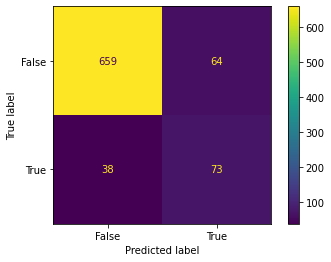

In [44]:
# Evaluating the performance of the model
evaluate(pipe_svm, X_test, y_test)

In [45]:
models = ['Logistic Regression (Base Model)', 'KNN', 'Decision Tree (Before Tuning)', 'Decision Tree (Tuned)', 'Random Forest (Before Tuning)', 'Random Forest (Tuned)', 'Support Vector Machine']
recall_scores = [0.729729, 0.63063, 0.756756, 0.7657657, 0.62162162, 0.657657, 0.65765]

The performance of the model is similar to the Random forest model in the Recall score metric

## Model evaluation

### Results

#### 1.) A machine learning model that can accurately predict customers  who will churn based on the features in the dataset.

The performances of the models can be shown using the chart below:

In [46]:
def plot_recall_scores(models, recall_scores):
    # Sort the recall scores and models in ascending order
    sorted_scores, sorted_models = zip(*sorted(zip(recall_scores, models)))

    # Create a bar graph
    plt.figure(figsize=(8, 6))
    bars = plt.barh(range(len(sorted_models)), sorted_scores, align='center')
    bars[6].set_color('red')  # Set the color of the first bar to red
    plt.yticks(range(len(sorted_models)), sorted_models)
    plt.xlabel('Recall Score')
    plt.ylabel('Models')
    plt.title('Recall Scores of Classification Models')

    # Show the plot
    plt.show()

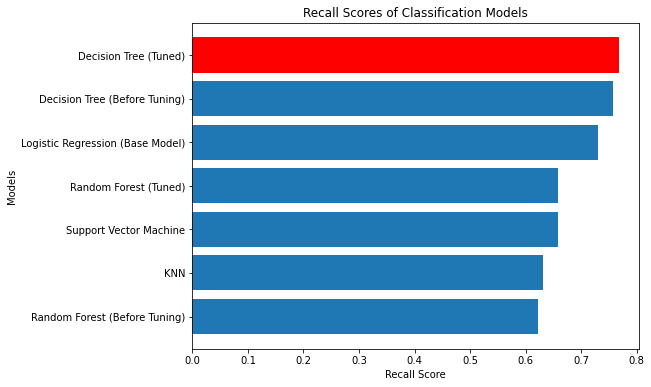

In [47]:
plot_recall_scores(models, recall_scores)

- The recall score was chosen as the ideal  evaluation metric. 

- This is because the goal of this project was to maximize the number of predictions of customers who are likely to churn. This means minimizing the number of false negatives, i.e the number of customers that the model predicts will not churn but they actually churn. 

- The problem is less sensitive to false positives at the expense of false negatives. This is because the problem suggests that the model would rather predict that a customer will churn and they fail to churn than predict that a customer will not churn and they actually end up churning. The latter would be more detrimental to the company financially than the former and thus the choice to select Redcall score as the ideal comparison metric.



1. The tuned Decision Tree model performed the best with the following results:

Recall Score:

Train: 0.9793135872120358
Test: 0.7657657657657657

Precision Score:

Train: 0.9806967984934086
Test: 0.47752808988764045

Accuracy Score:

Train: 0.9800188058298073
Test: 0.8573141486810552

F1 Score:

Train: 0.9800047047753468
Test: 0.5882352941176471

2. The model had the lowest number of false negatives.

Therefore, this was the best model and it was selected

#### 2.) A rank of features in the dataset according to their order of significance

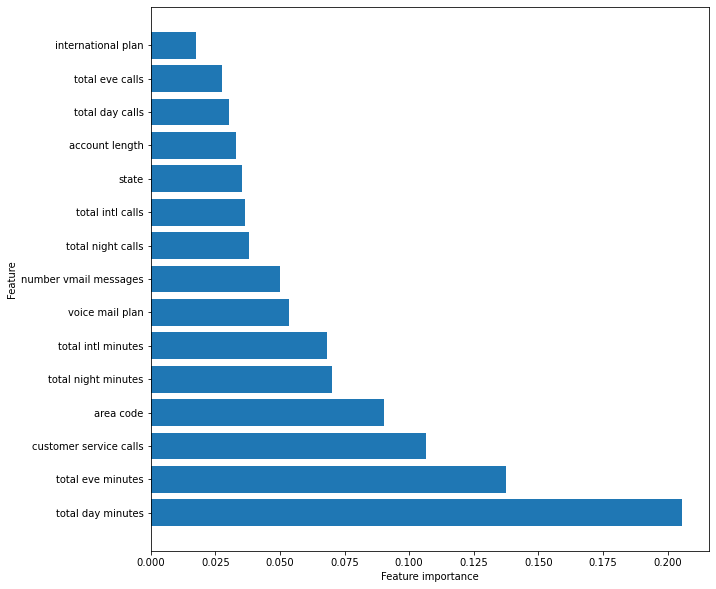

In [48]:
# A function that plots importance of features in ascending order
def plot_feature_importances(pipe, figsize):
    model = pipe.steps[1][1]
    importances = model.feature_importances_
    feature_names = X_train_resampled.columns
    sorted_indices = np.argsort(importances)[::-1]  # Sort indices in descending order
    sorted_importances = importances[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]
    
    plt.figure(figsize=figsize)
    plt.barh(sorted_feature_names, sorted_importances)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(pipe_dt, (10, 10))

From the chart shown above, the top 5 most important features in the model prediction are:
1. Total Day minutes
2. Total Evening minutes
3. Number of customer service calls
4. The area code they live in. 
5. The total nighrt minutes. 

This shows that the customers who make spend the most amout of time in calls and also make the highest number of customer service calls are most likely to churn.

It also shows that it is not the people who make many calls, but those who spend more time on calls who are likely to churn

## Conclusions and recommendations

The objective of the project was to identify clients who are likely to churn, in order to deploy strategies that reduce the pain points of customers and increase retention. 
The data was drawn from the CyriaTel Telecommuication company. This data was ananlysed and cleaned. Class imbalance was found in the target variable. This was addressed by the use of the SMOTE technique in the test set.

Different classification models were tried out including Logistic regression, KNN, Decision tree, Random Forest and Support Vector Machine. 
The Decision tree model offered the best model. 

In conclusion,
1. The model that meets the the success criteria, in predicting customers who will churn, of a sensitivity/ Recall score of 0.75 is the Tuned decision tree model.
2. The most important feature in predicting the churn rate is the number of minutes a customer spends on a call coupled with the number of customer service calls.

## Next steps

The next steps in this project would be to investigate how the area code ranks so highly in feature importance and how it affects customer churn. This could be due to:
1. An area experiencing unstable network connection issues due to poor coverage.
2. A lagrer population in certain areas that could cause system overload on existing infrustructure.
3. Demographic issues in a certain area which are being addressed by a competing telecom company.